<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/homework1/hw1_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv('synthetic_dataset100_training.csv')
df_train.head
df_train.insert(0,"x0",[1 for i in range(len(df_train))])
df_train.head
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    int64  
 1   x1      100 non-null    float64
 2   x2      100 non-null    float64
 3   y       100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


<Axes: xlabel='x1', ylabel='x2'>

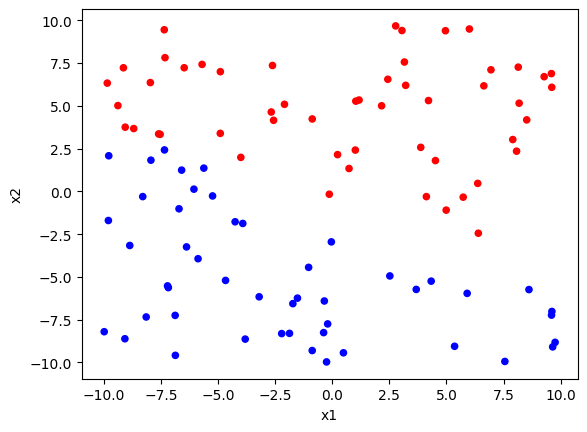

In [182]:
df_train["color"] = np.where(df_train["y"]==1, "red", "blue")
df_train.plot.scatter(x="x1", y="x2", color=df_train["color"])

In [183]:
df_y = df_train["y"]

def check_for_misclassified(w, df):
  for i in range(df.shape[0]):
      x = df.iloc[i, :3].values
      classified_value = np.dot(w, x)

      if classified_value * df_y.iloc[i] <= 1:
        x = np.append(x, df_y.iloc[i])
        return x
  return [-1,-1,-1,1]

In [184]:
def plot_graph(i, w):
  #The weights used in setting up synthetic dataset
  fw0 = 0.0005
  fw1 = 0.0004
  fw2 = 0.0009

  col = df_train['y'].map({-1:'b', 1:'r'})
  df_train.plot.scatter(x='x1', y='x2', c=col)
  axes = plt.gca()
  plt.xticks(range(-11,11))
  plt.yticks(range(-11,11))

  plt.ylim(-11, 11)
  plt.xlim(-11, 11)

  x_vals = np.array(axes.get_xlim())
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  fyAxis = -fw0/fw2 - (fw1/fw2*x_vals)
  plt.plot(x_vals, y_vals, '--')
  plt.plot(x_vals, fyAxis, '-')


def perceptron_adaline(df, n, max_iters):
  w = [0,0,0]
  i=0

  while(i<max_iters):
    misclass = check_for_misclassified(w, df)
    x = misclass[0:3]
    y = misclass[3]

    s = np.dot(w,x)
    w = w + n*(y-s)*x

    if np.isnan(w[0]):
      break

    i=i+1

  print("This is how many iterations it takes:",i)
  print("This is the final weight: ",w)
  plot_graph(i, w)

<__array_function__ internals>:180: RuntimeWarning: overflow encountered in double_scalars
<__array_function__ internals>:180: RuntimeWarning: invalid value encountered in double_scalars
<ipython-input-184-8a5dc8d2fc53>:33: RuntimeWarning: invalid value encountered in double_scalars
  w = w + n*(y-s)*x
<ipython-input-184-8a5dc8d2fc53>:33: RuntimeWarning: invalid value encountered in add
  w = w + n*(y-s)*x


This is how many iterations it takes: 85
This is the final weight:  [nan nan nan]


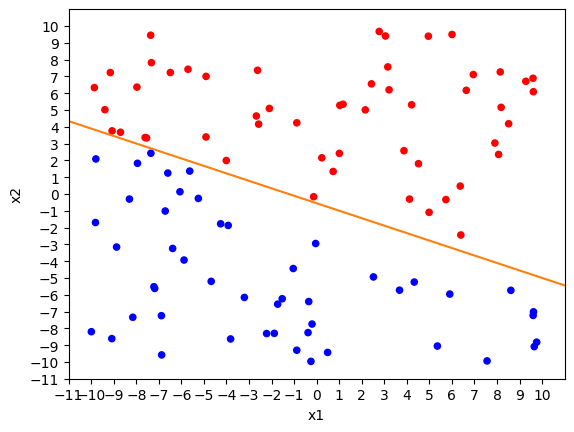

In [185]:
perceptron_adaline(df_train, 100, 1000)

In [186]:
perceptron_adaline(df_train, 1, 1000)

<ipython-input-184-8a5dc8d2fc53>:33: RuntimeWarning: overflow encountered in double_scalars
  w = w + n*(y-s)*x
<__array_function__ internals>:180: RuntimeWarning: overflow encountered in double_scalars
<__array_function__ internals>:180: RuntimeWarning: invalid value encountered in double_scalars
<ipython-input-184-8a5dc8d2fc53>:33: RuntimeWarning: invalid value encountered in double_scalars
  w = w + n*(y-s)*x


TypeError: ignored

This is how many iterations it takes: 1000
This is the final weight:  [-0.03496880202154437 0.18346301069801707 0.009343907766115274]


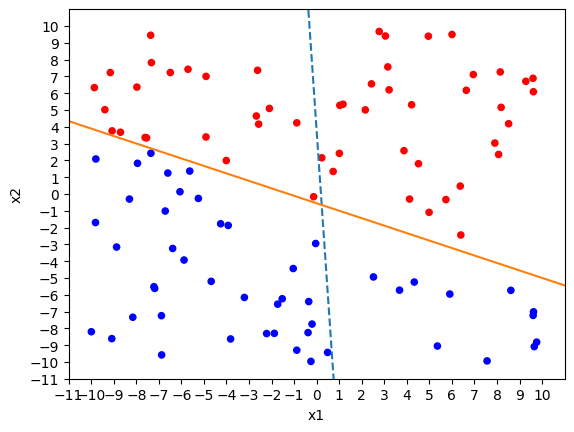

In [187]:
perceptron_adaline(df_train, .01, 1000)

This is how many iterations it takes: 1000
This is the final weight:  [-0.03297375492148303 0.17299604224893714 0.008810817267889315]


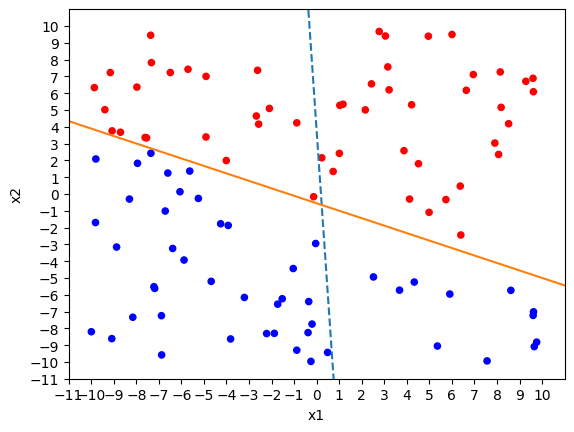

In [188]:
perceptron_adaline(df_train, .0001, 1000)

This is how many iterations it takes: 1000
This is the final weight:  [-2.9600019861232216e+174 5.656780195929695e+174 1.564104640004793e+175]


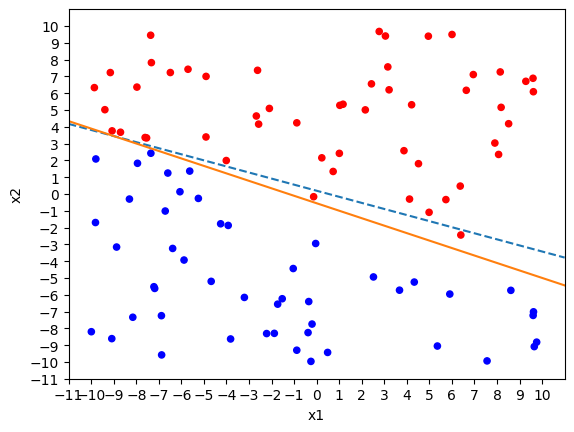

In [193]:
perceptron_adaline(df_train, .1, 1000)